In [98]:
import tensorflow.keras as keras
import tensorflow as tf

print(tf.__version__)

1.10.0


In [99]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [100]:
print(X_train[9]) # contains the image pixel values 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

In [101]:
print(y_train[9]) # contains the label 0-9 the number the pixels corresponds

4


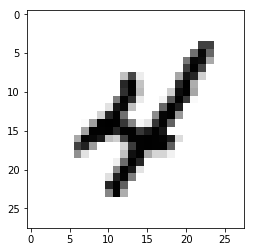

In [102]:
import matplotlib.pyplot as plt

plt.imshow(X_train[9], cmap=plt.cm.binary)
plt.show()

In [103]:
# earlier we had matrix values ranging from 0 to 254 so we normalized our values to come in between 0 and 1 as it would be more helpful for our nueral network
X_train = tf.keras.utils.normalize(X_train, axis=1) 
X_test = tf.keras.utils.normalize(X_test, axis=1)


In [104]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

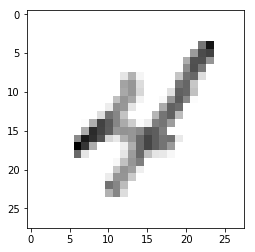

In [105]:
plt.imshow(X_train[9], cmap=plt.cm.binary)
plt.show()

In [106]:
model = tf.keras.models.Sequential() # a feed-forward model
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # prediction using the softmax function; we have 
# 10 labels 0 - 9...

In [107]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [108]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 74us/step - loss: 0.2586 - acc: 0.9244
Epoch 2/3
60000/60000 [==============================] - 4s 68us/step - loss: 0.1057 - acc: 0.9673
Epoch 3/3
60000/60000 [==============================] - 4s 70us/step - loss: 0.0740 - acc: 0.9768


In [109]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 29us/step
0.09429696952644735 0.9714


In [110]:
predictions = model.predict(X_test)

In [111]:
print(predictions) # these values are the probability distributions
#print(len(predictions))

[[4.28370805e-09 9.81207204e-09 5.01486102e-06 ... 9.99989629e-01
  1.01710755e-08 1.26950295e-06]
 [3.63006798e-08 5.27657103e-05 9.99941230e-01 ... 7.44909423e-09
  5.13637929e-07 2.23559799e-11]
 [1.15914105e-07 9.99927163e-01 1.10637347e-05 ... 2.63007005e-05
  2.62074591e-05 2.21837041e-07]
 ...
 [3.58479846e-09 3.86024738e-07 9.34566629e-08 ... 2.32093462e-05
  3.75847640e-06 4.48026367e-05]
 [7.79516469e-08 3.33684813e-09 3.21603744e-09 ... 2.12830908e-08
  1.12993075e-05 5.03528641e-09]
 [8.31390389e-06 7.02419186e-07 1.94680098e-07 ... 2.92539985e-11
  7.15753856e-08 1.42320138e-08]]


In [112]:
import numpy as np
print(np.argmax(predictions[9]))

9


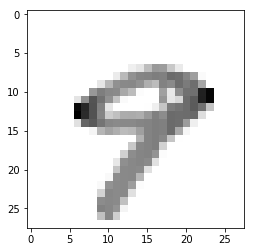

In [113]:
plt.imshow(X_test[9], cmap=plt.cm.binary)
plt.show()

In [114]:
X_test[9].shape

(28, 28)

In [115]:
import cv2
two = cv2.imread('two.jpg', cv2.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv2.threshold(two, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh = 127
im_bw = cv2.threshold(two, thresh, 255, cv2.THRESH_BINARY)[1]
size = 28
# two.shape
# rez = cv2.resize(two, (size, size))
# plt.imshow(rez)
# # cv2.imshow('ImageWindow', two)
# # cv2.waitKey()
im_bw.resize(dsize,size)

In [147]:
print(im_bw.shape)

(28, 28)


In [148]:
im_bw = tf.keras.utils.normalize(rez, axis=1)

In [149]:
print(im_bw)

[[0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
  0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
  0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
  0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
  0.18898224 0.18898224 0.18898224 0.18898224]
 [0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
  0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
  0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
  0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
  0.18898224 0.18898224 0.18898224 0.18898224]
 [0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
  0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
  0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
  0.18898224 0.18898224 0.18898224 0.18898224 0.18898224 0.18898224
  0.18898224 0.18898224 0.18898224 0.18898224]
 [0.18898224 0.18898224 0.18898224 0.188982

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [156]:
arr = np.reshape(im_bw, (X_train.shape[1], 1, X_train.shape[1]))
arr

array([[[0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
         0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
         0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
         0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
         0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
         0.18898224, 0.18898224, 0.18898224]],

       [[0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
         0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
         0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
         0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
         0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
         0.18898224, 0.18898224, 0.18898224]],

       [[0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
         0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
         0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
       

In [157]:
model.predict(arr)

ValueError: Error when checking input: expected sequential_1_input to have shape (28, 28) but got array with shape (1, 28)